1. Qual a média do preço de compra dos imóveis por “Nível”?
- Nível 0 -> Preço entre R$ 0 e R$ 321.950
- Nível 1 -> Preço entre R$ 321.950 e R$ 450.000
- Nível 2 -> Preço entre R$ 450.000 e R$ 645.000
- Nível 3 -> Acima de R$ 645.000


2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 2550 sqft
- Size 3 -> Tamanho acima de 2550 sqft

3. Adicione as seguinte informações ao conjunto de dados original:
- Place ID: Identificação da localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País

4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.

5. Adicione os seguinte filtros no Dashboard:

- Filtro por data disponível para compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água ou não.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data['level'] = data['price'].apply(lambda x: 0 if x<=321950 else 
                                          1 if (x>321950) & (x<450000) else
                                          2 if (x>450000) & (x<645000)else 3)
data['level'] = data['level'].astype(int)

<BarContainer object of 4 artists>

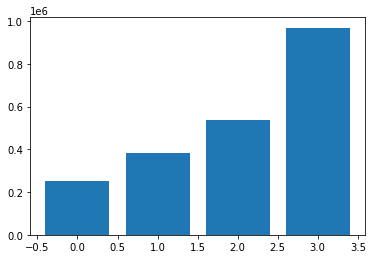

In [4]:
#Questão 1
med_per_level = data[['price','level']].groupby('level').mean().reset_index()
plt.bar(med_per_level['level'],med_per_level['price'])

In [5]:
#Questão 2
data['Size'] = data['sqft_living'].apply(lambda x: 0 if (x<=1427) else 
                                                   1 if (x>1427) & (x<=1910) else
                                                   2 if (x>1910) & (x<=2550) else 3)


<BarContainer object of 4 artists>

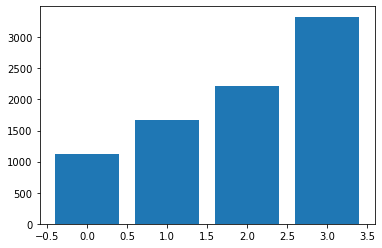

In [6]:
med_per_size = data[['sqft_living','Size']].groupby('Size').mean().reset_index()
plt.bar(med_per_size['Size'],med_per_size['sqft_living'])

In [7]:
med_per_size

,Size,sqft_living
0,0,1123.832531
1,1,1664.962334
2,2,2211.792786
3,3,3329.607016


#Paralelismo
-> Multi-Thread (Usado quando as tarefas tem dependência)
--> Processo(Tarefa)

#Async (Usado quando as tarefas não tem depedência)

In [8]:
#Questão 3
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='geopyExercises')

In [9]:
import time
from multiprocessing import Pool

In [10]:
data['query'] = data[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']) , axis=1)

In [11]:
import defs

df1 = data[['id','query']].sample(10)

p = Pool(3)

start = time.process_time()
df1[['place_id', 'osm_type' , 'country' , 'country_code']] = p.map(defs.get_data , df1.iterrows())
end = time.process_time()

print('Time Elapsed: {}' , end-start)

Time Elapsed: {} 0.02476791700000014


4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.

In [27]:
import ipywidgets as widgets 
from ipywidgets import interact, interactive, fixed, interact_manual 
from plotly import express as px
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [15]:
#define interactive bottons
price_limit = widgets.IntSlider(
        value=540000,
        min=7500,
        max=770000,
        step=1,
        description='Maximum Price',
        disable=False,
        style={'description_width':'initial'})

minimum_sqft= widgets.IntSlider(
        value=int(data['sqft_living'].mean()),
        min=290,
        max=13540,
        step=1,
        description='Min sqft_living',
        disable=False,
        style={'description_width':'initial'})

bathrooms_limit= widgets.IntSlider(
        value=int(data['bathrooms'].mean()),
        min=int(min(data['bathrooms'])),
        max=int(max(data['bathrooms'])),
        step=1,
        description='bathrooms',
        disable=False,
        style={'description_width':'initial'})

basement_limit= widgets.IntSlider(
        value=int(data['sqft_basement'].mean()),
        min=int(min(data['sqft_basement'])),
        max=int(max(data['sqft_basement'])),
        step=1,
        description='basement',
        disable=False,
        style={'description_width':'initial'})

condition_limit = widgets.IntSlider(
        value=int(data['condition'].mean()),
        min=int(min(data['condition'])),
        max=int(max(data['condition'])),
        step=1,
        description='condition',
        disable=False,
        style={'description_width':'initial'})

In [16]:
def update_map(df,price_limit,minimum_sqft , bathrooms_limit , basement_limit , condition_limit ):
    
    #filter data
    houses = df[(df['price']<price_limit) & 
                (df['sqft_living'] > minimum_sqft)  & 
                (df['bathrooms'] > bathrooms_limit ) & 
                (df['sqft_basement'] < basement_limit )
               & (df['condition'] > condition_limit)][['id' , 'lat' , 'long', 'price' ,'sqft_living' , 'sqft_basement' , 'condition']].copy()
   
    #plot map
    fig = px.scatter_mapbox(houses , 
                            lat = 'lat' , 
                            lon ='long' ,
                            size='price',
                            color_continuous_scale = px.colors.cyclical.IceFire ,
                            size_max=15,
                            zoom=10)
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height = 600, margin={'r':0 , 't':0,'l':0,'b':0})
    fig.show()

In [17]:
widgets.interactive(update_map , df=fixed(data) , price_limit=price_limit, 
                                                  minimum_sqft=minimum_sqft ,
                                                  bathrooms_limit=bathrooms_limit,
                                                  basement_limit=basement_limit,
                                                  condition_limit=condition_limit)

interactive(children=(IntSlider(value=540000, description='Maximum Price', max=770000, min=7500, style=SliderS…

5. Adicione os seguinte filtros no Dashboard:

- Filtro por data disponível para compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água ou não.

In [22]:
data['year'] = pd.to_datetime(data['date']).dt.strftime('%Y')
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')

date_limit = widgets.SelectionSlider(options=data['date'].unique().tolist(),
                                    value='2014-12-01',
                                    description='Max available date',
                                    disable=False,
                                     continuous_update=False,
                                     style={'description_width':'initial'},
                                     redout=True
                                    )

year_limit = widgets.SelectionSlider(options=data['yr_renovated'].unique().tolist(),
                                    value=2000,
                                    description='Max Year',
                                    disable=False,
                                     continuous_update=False,
                                     style={'description_width':'initial'},
                                     redout=True
                                    )

waterfront_limit = widgets.Checkbox(value=False,
                                   description='Is Waterfront?',
                                   disable=False,
                                   indent=False)

In [38]:
def update_map(data,date_limit,year_limit,waterfront_limit):
    df = data[(data['date']<date_limit) 
              & (data['yr_renovated']>=year_limit) 
              & (data['waterfront']==waterfront_limit)].copy()
    fig = plt.figure(figsize=(24,12))
    specs = gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
    
    ax1 = fig.add_subplot(specs[0, :])
    ax2 = fig.add_subplot(specs[1,0])
    ax3 = fig.add_subplot(specs[1,1])
    
    by_year = df[['price','year']].groupby( 'year' ).sum().reset_index()
    sns.barplot(x='year', y='price', data=by_year,ax=ax1)
    
    by_day = df[['price','date']].groupby('date').mean().reset_index()
    sns.lineplot(x='date',y='price',data=by_day,ax=ax2)
    
    by_year_week = df[['price','year_week']].groupby('year_week').mean().reset_index()
    sns.barplot(x='year_week',y='price',data=by_year_week,ax=ax3)
    plt.xticks(rotation=90);

In [39]:
widgets.interactive(update_map,data=fixed(data),date_limit=date_limit,year_limit=year_limit,waterfront_limit=waterfront_limit)

interactive(children=(SelectionSlider(continuous_update=False, description='Max available date', index=87, opt…